In [5]:
import pandas as pd
import numpy as np
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

root_dir = '/oak/stanford/groups/horence/rob/MERFISH_spatial_data'

sys.path.append(os.path.join(root_dir,'scripts'))
import spatial_utils
import plot_utils

In [2]:
centroid_df = pd.read_csv('../20210106_centroid_dist_scores.csv')
centroid_df.head()

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
0,10000143038275111136124942858811168393,Adra1b,1,2.779945,-0.476989
1,10000143038275111136124942858811168393,Aqp4,1,3.808437,-0.163907
2,10000143038275111136124942858811168393,Bcl11b,1,5.658580,0.399294
3,10000143038275111136124942858811168393,Brinp3,1,4.015005,-0.101026
4,10000143038275111136124942858811168393,Cdh20,3,3.606702,-0.225317


In [11]:
x = centroid_df[['cell_id','target_molecule_name','num_cell_spots']].head()
x['num_gene_spots'] = np.random.randint(6,20,5)
x['metric_name'] = 'centroid_dist'
x['raw_metric'] = np.random.rand(5)*9
x['cell_zscore'] = np.random.rand(5)-0.5
x['overall_zscore'] = np.random.rand(5)-0.5
x

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,overall_zscore
0,10000143038275111136124942858811168393,Adra1b,1,19,centroid_dist,1.815505,-0.302119,-0.203078
1,10000143038275111136124942858811168393,Aqp4,1,6,centroid_dist,2.743423,-0.380195,-0.149335
2,10000143038275111136124942858811168393,Bcl11b,1,17,centroid_dist,8.417139,-0.300100,0.049828
3,10000143038275111136124942858811168393,Brinp3,1,14,centroid_dist,4.383927,-0.422396,0.104364
4,10000143038275111136124942858811168393,Cdh20,3,17,centroid_dist,1.074118,-0.246510,0.270255


In [5]:
centroid_df['cell_id'].unique().size

237949

In [6]:
polarity_df = pd.read_csv('../20210106_polarity_scores.csv')
polarity_df.head()

,cell_id,target_molecule_name,gene_centroidX,gene_centroidY,cell_centroidX,cell_centroidY,gene_centroid_dist,z_score_polarity
0,10000143038275111136124942858811168393,Adra1b,4737.304000,3078.174000,4738.63409,3075.732903,2.779945,-0.092509
1,10000143038275111136124942858811168393,Aqp4,4734.825700,3075.751700,4738.63409,3075.732903,3.808437,0.153531
2,10000143038275111136124942858811168393,Bcl11b,4732.999500,3075.212400,4738.63409,3075.732903,5.658580,0.596132
3,10000143038275111136124942858811168393,Brinp3,4737.842000,3079.669000,4738.63409,3075.732903,4.015005,0.202948
4,10000143038275111136124942858811168393,Cdh20,4737.719533,3077.114767,4738.63409,3075.732903,1.657094,-0.361123


In [7]:
polarity_df['cell_id'].unique().size

237949

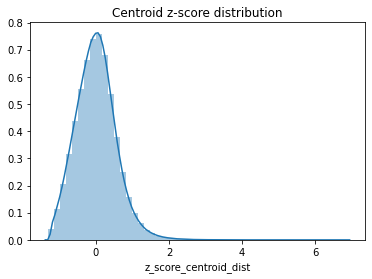

In [10]:
sns.distplot(
    centroid_df['z_score_centroid_dist'],
)
plt.title('Centroid z-score distribution')
plt.show()
plt.close()

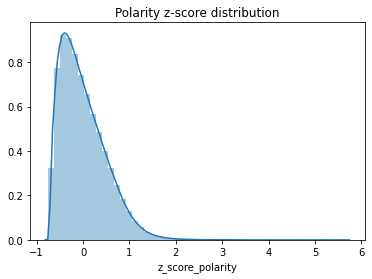

In [9]:
sns.distplot(
    polarity_df['z_score_polarity'],
)
plt.title('Polarity z-score distribution')
plt.show()
plt.close()

In [14]:
cell_ids = centroid_df[centroid_df['z_score_centroid_dist'].gt(4)]['cell_id'].unique()
skew_centroid_df = centroid_df[centroid_df['cell_id'].isin(cell_ids)]
skew_centroid_df.head()

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
201094,104219824833050861848495496292093688850,5730522E02Rik,1,8.868535,1.376433
201095,104219824833050861848495496292093688850,Acta2,1,6.391704,0.622463
201096,104219824833050861848495496292093688850,Adamts2,1,14.841440,3.194641
201097,104219824833050861848495496292093688850,Adamts4,1,19.543210,4.625903
201098,104219824833050861848495496292093688850,Adra1b,7,9.384239,1.533419


In [26]:
skew_genes = centroid_df[centroid_df['z_score_centroid_dist'].gt(4)]
skew_genes[skew_genes['num_cell_spots'] == skew_genes['num_cell_spots'].max()]

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
4716304,198426927978050439832252189161704654926,Tshz2,52,17.77415,4.087384


In [16]:
cells = pd.read_csv('../processed_data/segmented_cell_shapes.csv')

In [18]:
spots = pd.read_csv('../processed_data/all_passing_rna_spots.csv')

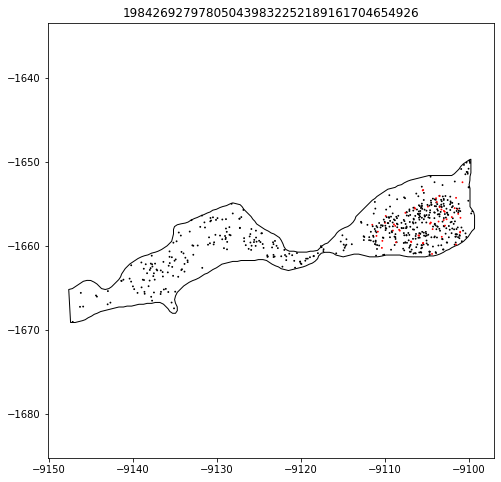

In [27]:
import importlib
importlib.reload(plot_utils)

for cell_id,g in skew_centroid_df.groupby('cell_id'):
    cell_id = '198426927978050439832252189161704654926' #NOTE
    cells_subset = cells[cells['cell_id'].eq(cell_id)]
    spots_subset = spots[spots['cell_id'].eq(cell_id)]
    
    plot_utils.plot_spot_cells(spots_subset, cells_subset, spot_colors={'Tshz2':'r'})
    plt.show()
    plt.close()
    break